In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sy
import defdap
from defdap import quat
from defdap import ebsd
from defdap import hrdic
import Package_DH
from Package_DH import Plotsliptrace,take_shear_data,sb_angle,detect_angle,detect_angle2,find_closest,crop_image,angles_0_to_90

In [2]:
%matplotlib inline

In [3]:
step = 11 # two digits

dicFilePath ={'A3_zone1':"../HRDIC/DIC_data/A3/zone_1/take 3/",
             'A3_zone2':"../HRDIC/DIC_data/A3/zone_2/take3/",
             'A3_zone3':"../HRDIC/DIC_data/A3/zone_3/take 3/",
             'B2_zone1':"../HRDIC/DIC_data/B2/take 2/"} 

region = 'A3_zone3'
DicMap = hrdic.Map(dicFilePath[region], "B000{}.txt".format(str(step)))
#output ="../results/A3_zone3/"

Loaded DaVis 8.4.0 data (dimensions: 2160 x 2214 pixels, sub-window size: 12 x 12 pixels)


In [4]:
DicMap.setPatternPath('01-1.BMP',1) 
DicMap.setScale(micrometrePerPixel=40/2048)

In [5]:
max_shear_data = DicMap.eMaxShear

[]

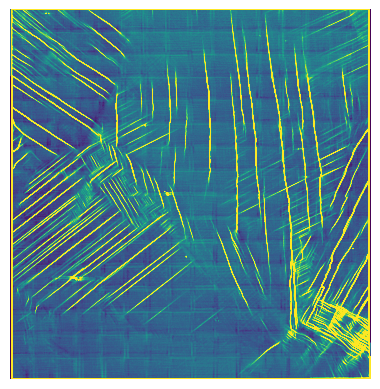

In [6]:
DPI = 10
x = DicMap.xDim / DPI
y = DicMap.yDim / DPI

fig, ax = plt.subplots()#figsize=(x, y), dpi=DPI)
img = ax.imshow(max_shear_data,  vmin=0, vmax=0.015)
plt.axis('off')  # Hide the axes
plt.gca().spines['top'].set_visible(False)    # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine
plt.gca().spines['left'].set_visible(False)   # Hide left spine
plt.gca().spines['bottom'].set_visible(False) # Hide bottom spine
plt.gca().xaxis.set_ticks([])  # Remove x-axis ticks
plt.gca().yaxis.set_ticks([])  # Remove y-axis ticks
#ax.axis('off')
#plt.tight()
#plt.savefig('slip_trace_image_{}.png'.format(region),dpi=DPI, bbox_inches='tight', pad_inches=0)

In [7]:
def crop_image(image, crop_amount):
    if crop_amount > 0:
        return image[crop_amount:-crop_amount, crop_amount:-crop_amount]
    else:
        return image

In [8]:
img_path = 'slip_trace_image_{}.png'.format(region)
strain_map = mpimg.imread(img_path)

(-0.5, 2119.5, 2173.5, -0.5)

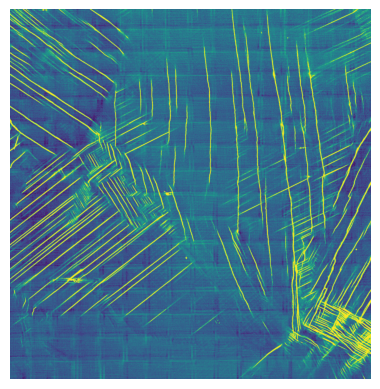

In [9]:
img_path = 'slip_trace_image_{}.png'.format(region)
strain_map = mpimg.imread(img_path)
cropped_strain_map = crop_image(strain_map, 20)
plt.figure()# dpi=600)
plt.imshow(cropped_strain_map)
plt.axis('off')

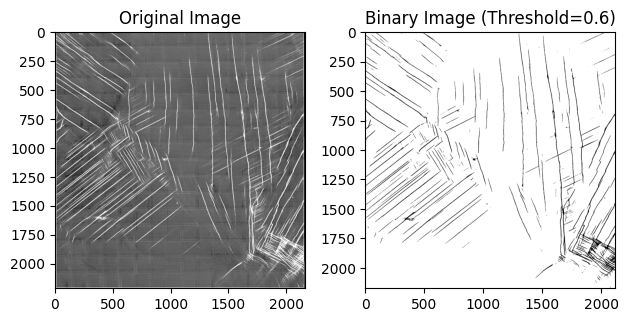

In [10]:
if strain_map.ndim == 3:
    strain_map = np.mean(strain_map, axis=2)
threshold = 0.6

slip_bands_map = np.where(strain_map > threshold, 1.0, 0.0)
cropped_slip_bands = crop_image(slip_bands_map, 20)
fig, axes = plt.subplots(1, 2)#, figsize=(12, 6))

axes[0].imshow(strain_map, cmap='gray')
axes[0].set_title('Original Image')
#axes[0].axis('off')

axes[1].imshow(cropped_slip_bands, cmap='binary')
axes[1].set_title('Binary Image (Threshold={})'.format(threshold))
#axes[1].axis('off')

#for ax in axes:
#    ax.axis('off')
#    ax.spines['top'].set_visible(False)
#    ax.spines['right'].set_visible(False)#
#    ax.spines['left'].set_visible(False)
#    ax.spines['bottom'].set_visible(False)

plt.tight_layout()

plt.show()

In [11]:
cropped_slip_bands.shape

(2174, 2120)

In [12]:
image_path = {'A3_zone1':'../HRDIC/microstructure_data/beta_ligaments_a3_zone1.png',
              'A3_zone2':'../HRDIC/microstructure_data/beta_ligaments_a3_zone2.png',
              'A3_zone3':'../HRDIC/microstructure_data/beta_ligaments_a3_zone3.png'}
              
microstrucutre_image = mpimg.imread(image_path[region])

max_value = np.max(microstrucutre_image)
microstrucutre_image_inverted = max_value - microstrucutre_image

(-0.5, 2119.5, 2173.5, -0.5)

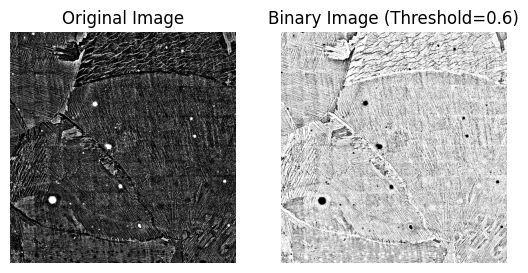

In [13]:
if microstrucutre_image_inverted.ndim == 3:
    microstrucutre_image_inverted = np.mean(microstrucutre_image_inverted, axis=2)
threshold = 0.6

beta_ligaments_map = np.where(microstrucutre_image_inverted > threshold, 1.0, 0.0)
cropped_beta_map = crop_image(beta_ligaments_map, 20)

fig, axes = plt.subplots(1, 2)#, figsize=(12, 6),dpi=600)

axes[0].imshow(beta_ligaments_map, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(cropped_beta_map, cmap='binary')
axes[1].set_title('Binary Image (Threshold={})'.format(threshold))
axes[1].axis('off')

In [14]:
from skimage.morphology import thin

Text(0.5, 1.0, 'Segmented strain')

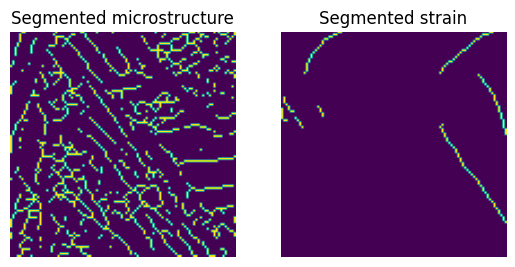

In [15]:
top_left = (1000,450)
length = 100

segmented_microstructure = cropped_beta_map[top_left[0]:top_left[0] + length,top_left[1]: top_left[1] + length]
segmented_strain = cropped_slip_bands[top_left[0]:top_left[0] + length,top_left[1]: top_left[1] + length]

fig, axes = plt.subplots(1, 2)
axes[0].imshow(thin(segmented_microstructure))
axes[0].axis('off')  # Hide the axes
axes[0].set_title('Segmented microstructure')

axes[1].imshow(thin(segmented_strain))
axes[1].axis('off')  # Hide the axes
axes[1].set_title('Segmented strain')

#plt.show()
#plt.savefig('cropped_images.png')

In [16]:
profile_filted_microstructure,angles_index_microstructure = sb_angle(thin(segmented_microstructure), plot_maps = False)
#profile_filted_microstructure,angles_index_microstructure

In [17]:
profile_filted_microstructure,angles_index_microstructure = sb_angle(segmented_microstructure, plot_maps = False)

In [19]:
profile_filted_strain, angles_index_strain = sb_angle(segmented_strain,plot_maps=False)

In [20]:
microstructure_angle = detect_angle(profile_filted_microstructure,angles_index_microstructure)
strain_angle = detect_angle(profile_filted_strain ,angles_index_strain)

In [21]:
slip_bands_map.shape == beta_ligaments_map.shape

True

In [ ]:
strain_angles = []
microstructure_angles = []

top_left = np.array([0,0])
length = 30

if cropped_slip_bands.shape == cropped_beta_map.shape:
    for y in range(top_left[1], cropped_slip_bands.shape[1], length):
        for x in range(top_left[0], cropped_slip_bands.shape[0], length):
            top_left = np.array([x, y])
            #print(top_left)
            segmented_microstructure = thin(cropped_beta_map[top_left[0]:top_left[0] + length, top_left[1]: top_left[1] + length])
            segmented_strain = thin(cropped_slip_bands[top_left[0]:top_left[0] + length, top_left[1]: top_left[1] + length])
            
            profile_filted_microstructure,angles_index_microstructure = sb_angle(segmented_microstructure,plot_maps=False)
            
            profile_filted_strain, angles_index_strain = sb_angle(segmented_strain,plot_maps=False)
            
            microstructure_angle = detect_angle(profile_filted_microstructure,angles_index_microstructure)
            #if microstructure_angle!='None':
                #if microstructure_angle==90:
                    #input()
            strain_angle = detect_angle(profile_filted_strain ,angles_index_strain)
            
            #if not (microstructure_angle == 'none') and not (strain_angle == 'none'):
            strain_angles.append(strain_angle)
            microstructure_angles.append(microstructure_angle)
        top_left[0]=0

In [ ]:
#sb_angle(segmented_microstructure,plot_maps=True)

In [ ]:
#sb_angle(segmented_strain,plot_maps=False)

In [ ]:
#print(microstructure_angles)

In [ ]:
s_count = sum(1 for x in strain_angles if x != 'None')
m_count = sum(1 for x in microstructure_angles if x != 'None')
#print(s_count,m_count)

In [ ]:
# Example lists (assuming these are your loaded data)
#microstructure_angles = ['10', '20', 'none', '40', '50']
#strain_angles = ['5', 'none', '15', 'none', '25']

# Lists to hold filtered data
filtered_microstructure_angles = []
filtered_strain_angles = []

# Filtering process
for micro_angle, strain_angle in zip(microstructure_angles, strain_angles):
    if micro_angle != 'None' and strain_angle != 'None':
        if micro_angle != 90 and strain_angle != 90:
            filtered_microstructure_angles.append(micro_angle)
            filtered_strain_angles.append(strain_angle)

filtered_microstructure_angles = angles_0_to_90(filtered_microstructure_angles)
filtered_strain_angles = angles_0_to_90(filtered_strain_angles)
# Output the filtered lists
#print(filtered_microstructure_angles)
#print(filtered_strain_angles)


In [ ]:
plt.hist(filtered_microstructure_angles, bins=90)

In [ ]:
plt.hist(filtered_strain_angles, bins=90)

In [ ]:
plt.scatter(filtered_microstructure_angles,filtered_strain_angles,label='{}'.format(region))
plt.xlabel('Beta ligament angle')
plt.ylabel('Strain angle')
plt.legend()

In [ ]:
#np.save('{}_microstruture_angles.npy'.format(region),filtered_microstructure_angles)
#np.save('{}_slip_angles.npy'.format(region),filtered_strain_angles)

In [ ]:
A3_zone1_microstructure = np.load('A3_zone1_microstruture_angles.npy')
A3_zone2_microstructure = np.load('A3_zone2_microstruture_angles.npy')
A3_zone3_microstructure = np.load('A3_zone3_microstruture_angles.npy')

A3_zone1_slip = np.load('A3_zone1_slip_angles.npy')
A3_zone2_slip = np.load('A3_zone2_slip_angles.npy')
A3_zone3_slip = np.load('A3_zone3_slip_angles.npy')

In [ ]:
plt.figure()
plt.scatter(A3_zone1_microstructure,A3_zone1_slip,label='ROI1')
plt.scatter(A3_zone2_microstructure,A3_zone2_slip,label='ROI2')
plt.scatter(A3_zone3_microstructure,A3_zone3_slip,label='ROI3')

plt.xlabel('Beta ligament angle')
plt.ylabel('Strain angle')
plt.savefig('scatter_strain_vs_beta.png')
plt.legend()

In [ ]:
all_microstructure = np.concatenate((A3_zone1_microstructure, A3_zone2_microstructure, A3_zone3_microstructure))
all_slip = np.concatenate((A3_zone1_slip, A3_zone2_slip, A3_zone3_slip))

# Create a 2D histogram to aggregate the data into a grid
heatmap, xedges, yedges = np.histogram2d(all_microstructure, all_slip, bins=180)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis',vmax=2)
plt.colorbar(label='Density')

specific_value = 55.5  # Replace with your desired y value
plt.axhline(y=specific_value, color='red', linestyle='--', linewidth=2)

plt.xlabel('Beta ligament angle')
plt.ylabel('Strain angle')
plt.title('Heat Map of Microstructure vs. Slip')

plt.ylim(50, 60)
#plt.savefig('heat_map_strain_vs_beta.png')
plt.show()

In [ ]:
int('a')

In [ ]:
np.array(filtered_microstructure_angles).shape

In [ ]:
slip_bands_map.shape# == beta_ligaments_map.shape

In [30]:
A3_zone1_microstructure = np.load('A3_zone1_microstruture_angles.npy')
A3_zone2_microstructure = np.load('A3_zone2_microstruture_angles.npy')
A3_zone3_microstructure = np.load('A3_zone3_microstruture_angles.npy')

A3_zone1_slip = np.load('A3_zone1_slip_angles.npy')
A3_zone2_slip = np.load('A3_zone2_slip_angles.npy')
A3_zone3_slip = np.load('A3_zone3_slip_angles.npy')

In [7]:
angle_a3_zone1 = np.abs(A3_zone1_microstructure-A3_zone1_slip)
angle_a3_zone2 = np.abs(A3_zone2_microstructure-A3_zone2_slip)
angle_a3_zone3 = np.abs(A3_zone3_microstructure-A3_zone3_slip)
angle = list(angle_a3_zone1)+list(angle_a3_zone2)+list(angle_a3_zone3)

(array([ 55.,  93.,  91.,  84.,  59., 112., 107., 128.,  69., 137., 118.,
        107.,  48., 127., 123., 104.,  55.,  81.,  62.,  52.,  32.,  39.,
         38.,  26.,  12.,  30.,  35.,  22.,   8.,  18.,  17.,  26.,   8.,
         12.,   9.,  16.,   3.,  14.,  10.,   8.,   2.,   2.,   2.,   3.,
          2.]),
 array([ 0.        ,  1.75555556,  3.51111111,  5.26666667,  7.02222222,
         8.77777778, 10.53333333, 12.28888889, 14.04444444, 15.8       ,
        17.55555556, 19.31111111, 21.06666667, 22.82222222, 24.57777778,
        26.33333333, 28.08888889, 29.84444444, 31.6       , 33.35555556,
        35.11111111, 36.86666667, 38.62222222, 40.37777778, 42.13333333,
        43.88888889, 45.64444444, 47.4       , 49.15555556, 50.91111111,
        52.66666667, 54.42222222, 56.17777778, 57.93333333, 59.68888889,
        61.44444444, 63.2       , 64.95555556, 66.71111111, 68.46666667,
        70.22222222, 71.97777778, 73.73333333, 75.48888889, 77.24444444,
        79.        ]),
 <BarCon

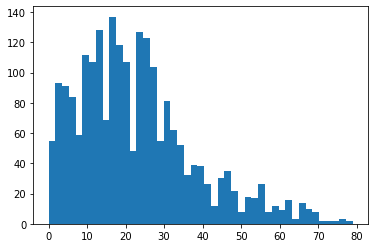

In [10]:
plt.hist(angle,bins=45)

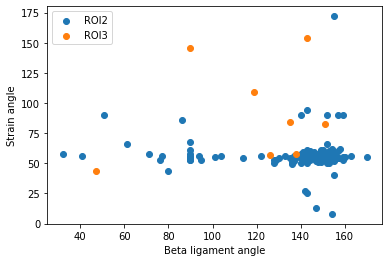

In [10]:
plt.figure()
#plt.scatter(A3_zone1_microstructure,A3_zone1_slip,label='ROI1')
plt.scatter(A3_zone2_microstructure,A3_zone2_slip,label='ROI2')
plt.scatter(A3_zone3_microstructure,A3_zone3_slip,label='ROI3')

plt.xlabel('Beta ligament angle')
plt.ylabel('Strain angle')
plt.legend()
plt.savefig('scatterplot.png')

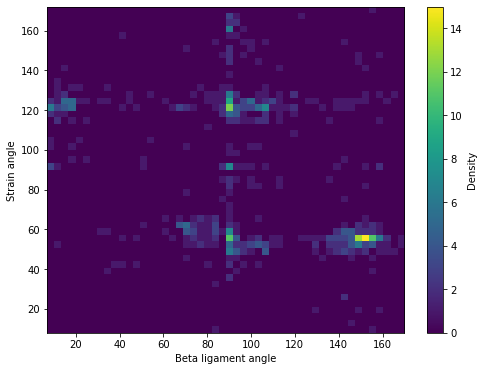

In [8]:
all_microstructure = np.concatenate((A3_zone1_microstructure, A3_zone2_microstructure, A3_zone3_microstructure))
all_slip = np.concatenate((A3_zone1_slip, A3_zone2_slip, A3_zone3_slip))

# Create a 2D histogram to aggregate the data into a grid
heatmap, xedges, yedges = np.histogram2d(all_microstructure, all_slip, bins=50)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(heatmap.T, origin='lower', aspect='auto', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
plt.colorbar(label='Density')

plt.xlabel('Beta ligament angle')
plt.ylabel('Strain angle')
#plt.title('Heat Map of Microstructure vs. Slip')
plt.savefig('heatmap.png')

In [ ]:
int('a')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy as sy
import defdap
from defdap import quat
from defdap import ebsd
from defdap import hrdic
import Package_DH
from Package_DH import Plotsliptrace,take_shear_data,sb_angle,detect_angle,detect_angle2,find_closest,crop_image,angles_0_to_90
%matplotlib inline

regions = ['A3_zone1','A3_zone2','A3_zone3']
for region in regions:
    img_path = 'slip_trace_image_{}.png'.format(region)
    strain_map = mpimg.imread(img_path)

    if strain_map.ndim == 3:
        strain_map = np.mean(strain_map, axis=2)
    threshold = 0.6

    slip_bands_map = np.where(strain_map > threshold, 1.0, 0.0)
    cropped_slip_bands = crop_image(slip_bands_map, 20)

    image_path = {'A3_zone1':'../HRDIC/microstructure_data/beta_ligaments_a3_zone1.png',
                  'A3_zone2':'../HRDIC/microstructure_data/beta_ligaments_a3_zone2.png',
                  'A3_zone3':'../HRDIC/microstructure_data/beta_ligaments_a3_zone3.png'}
              
    microstrucutre_image = mpimg.imread(image_path[region])

    max_value = np.max(microstrucutre_image)
    microstrucutre_image_inverted = max_value - microstrucutre_image

    if microstrucutre_image_inverted.ndim == 3:
        microstrucutre_image_inverted = np.mean(microstrucutre_image_inverted, axis=2)
    threshold = 0.6

    beta_ligaments_map = np.where(microstrucutre_image_inverted > threshold, 1.0, 0.0)
    cropped_beta_map = crop_image(beta_ligaments_map, 20)

    strain_angles = []
    microstructure_angles = []

    top_left = np.array([0,0])
    length = 30

    if cropped_slip_bands.shape == cropped_beta_map.shape:
        for y in range(top_left[1], cropped_slip_bands.shape[1], length):
            for x in range(top_left[0], cropped_slip_bands.shape[0], length):
                top_left = np.array([x, y])
                #print(top_left)
                segmented_microstructure = (cropped_beta_map[top_left[0]:top_left[0] + length, top_left[1]: top_left[1] + length])
                segmented_strain = (cropped_slip_bands[top_left[0]:top_left[0] + length, top_left[1]: top_left[1] + length])
            
                profile_filted_microstructure,angles_index_microstructure = sb_angle(segmented_microstructure,plot_maps=False)
                profile_filted_strain, angles_index_strain = sb_angle(segmented_strain,plot_maps=False)
            
                microstructure_angle = detect_angle(profile_filted_microstructure,angles_index_microstructure)
                strain_angle = detect_angle(profile_filted_strain ,angles_index_strain)
            
                strain_angles.append(strain_angle)
                microstructure_angles.append(microstructure_angle)
            top_left[0]=0
        
    filtered_microstructure_angles = []
    filtered_strain_angles = []

    for micro_angle, strain_angle in zip(microstructure_angles, strain_angles):
        if micro_angle != 'None' and strain_angle != 'None':
            if micro_angle != 90 and strain_angle != 90:
                filtered_microstructure_angles.append(micro_angle)
                filtered_strain_angles.append(strain_angle)

    filtered_microstructure_angles = angles_0_to_90(filtered_microstructure_angles)
    filtered_strain_angles = angles_0_to_90(filtered_strain_angles)

    relative_angles = np.abs(np.array(filtered_microstructure_angles) - np.array(filtered_strain_angles))
    np.save('relative_angles_{}.npy'.format(region),relative_angles)

In [12]:
relative_angles_A3_zone1 = np.load('relative_angles_A3_zone1.npy')
relative_angles_A3_zone2 = np.load('relative_angles_A3_zone2.npy')
relative_angles_A3_zone3 = np.load('relative_angles_A3_zone3.npy')
relative_angle = list(relative_angles_A3_zone1) + list(relative_angles_A3_zone2) + list(relative_angles_A3_zone3)

In [ ]:
plt.figure()#dpi=1200)
plt.hist(relative_angle,bins=45)
plt.xlabel('Slip trace - lath angle (degrees)')
plt.ylabel('Count')
plt.savefig('relative_angle_plot.png')